# 인공신경망 모델의 학습

- 3장에서 설명한 부분을 제외하고 주석을 달았습니다.
- y = x^2+3

## 필요한 라이브러리 불러오기

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init

## 데이터 생성

In [4]:
num_data = 1000
num_epoch = 10000

noise = init.normal_(torch.FloatTensor(num_data,1),std=1)
x = init.uniform_(torch.Tensor(num_data,1),-15,15)
y = (x**2) + 3 
y_noise = y + noise


In [6]:
print(x)

tensor([[ 12.5923],
        [ -9.2519],
        [ -4.8618],
        [  2.2950],
        [ -8.1967],
        [ -2.8621],
        [  1.5329],
        [ -8.6341],
        [  5.6802],
        [ -0.1710],
        [-13.8032],
        [ -2.6029],
        [ -7.5982],
        [ 14.6062],
        [  8.9577],
        [ 11.1172],
        [-10.5577],
        [ 14.0849],
        [ -7.9376],
        [  7.1835],
        [ 14.5218],
        [-13.5485],
        [  1.6188],
        [  6.3055],
        [  2.0290],
        [  6.6190],
        [  5.8201],
        [ -1.5112],
        [  2.0433],
        [  8.4981],
        [  7.1616],
        [  5.9700],
        [  9.1018],
        [ -7.4804],
        [ 13.2966],
        [  2.8421],
        [  4.4668],
        [  3.4593],
        [ -0.6612],
        [-14.7540],
        [ -6.9179],
        [  3.2036],
        [ -0.2218],
        [  2.7316],
        [  2.2163],
        [  6.9365],
        [ -4.5106],
        [ -9.0445],
        [ 12.1280],
        [ -9.4339],


In [7]:
print(y)

tensor([[161.5672],
        [ 88.5978],
        [ 26.6368],
        [  8.2673],
        [ 70.1861],
        [ 11.1916],
        [  5.3499],
        [ 77.5470],
        [ 35.2642],
        [  3.0292],
        [193.5283],
        [  9.7753],
        [ 60.7327],
        [216.3406],
        [ 83.2406],
        [126.5927],
        [114.4647],
        [201.3841],
        [ 66.0061],
        [ 54.6024],
        [213.8819],
        [186.5619],
        [  5.6205],
        [ 42.7596],
        [  7.1170],
        [ 46.8115],
        [ 36.8740],
        [  5.2838],
        [  7.1752],
        [ 75.2176],
        [ 54.2881],
        [ 38.6411],
        [ 85.8432],
        [ 58.9568],
        [179.7998],
        [ 11.0777],
        [ 22.9525],
        [ 14.9669],
        [  3.4372],
        [220.6807],
        [ 50.8577],
        [ 13.2630],
        [  3.0492],
        [ 10.4618],
        [  7.9119],
        [ 51.1154],
        [ 23.3452],
        [ 84.8024],
        [150.0891],
        [ 91.9985],


# 모델, 손실 함수, 최적화 함수 설정

In [3]:
# 3장의 예시처럼 하나의 값이 들어가서 하나의 값이 나오기 때문에 모델의 처음과 끝 특성의 개수는 1개입니다.

# https://pytorch.org/docs/stable/nn.html?highlight=sequential
# torch.nn.Sequential
# Sequential 모듈은 다양한 모듈을 담을 수 있는 일종의 리스트라고 보면 됩니다.
# Sequential 에 정의된 순서대로 연산이 진행되며, 많은 연산을 묶어서 한번에 관리할 수 있어서 편리합니다.

# 아래 코드는 특성의 개수가 1 -> 6 -> 10 -> 6 -> 1개로 변하는 인공신경망입니다. 
# 또한 선형변환 이후 활성화 함수를 넣어 비선형성이 생기도록 했습니다.

model = nn.Sequential(
          nn.Linear(1,6),
          nn.ReLU(),
          nn.Linear(6,10),
          nn.ReLU(),
          nn.Linear(10,6),
          nn.ReLU(),
          nn.Linear(6,1),
      )

loss_func = nn.L1Loss()
optimizer = optim.SGD(model.parameters(),lr=0.0002)

## 모델의 학습

In [4]:
loss_array = []
for i in range(num_epoch):
    optimizer.zero_grad()
    output = model(x)
    
    loss = loss_func(output,y_noise)
    loss.backward()
    optimizer.step()
    
    loss_array.append(loss)

## 손실 그래프

RuntimeError: Can't call numpy() on Tensor that requires grad. Use tensor.detach().numpy() instead.

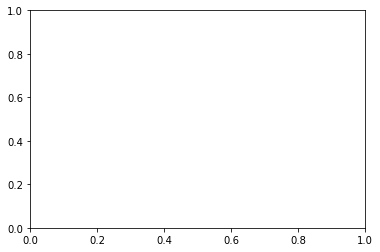

In [5]:
import matplotlib.pyplot as plt

plt.plot(loss_array)
plt.show()

## 학습된 모델의 결과값과 실제 목표값의 비교

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x.detach().numpy(),y_noise,label="Original Data")
plt.scatter(x.detach().numpy(),output.detach().numpy(),label="Model Output")
plt.legend()
plt.show()